## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。


In [1]:
import json

with open('hw4_data.json', 'r') as f:
    data = json.load(f)

users_data = data['nodes']
edges_data = data['edges']

social_network = {}

for user in users_data:
    social_network[user[0]] = {}

for edge in edges_data:
    user1, user2, weight = edge
    social_network[user1][user2] = weight
    social_network[user2][user1] = weight  

print(social_network)

{'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}, 'tyn1998': {'a

- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。


In [2]:

friends = {user: list(social_network[user].keys()) for user in social_network}


for user, friends_list in friends.items():
    print(f"{user}'s direct friends: {friends_list}")

Yanyan-Wang's direct friends: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca's direct friends: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu's direct friends: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998's direct friends: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-


#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。


In [3]:
degree = {user: len(friends_list) for user, friends_list in friends.items()}

top_5_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]

for user, deg in top_5_degree:
    print(f"{user}: {deg} friends")

tyn1998: 30 friends
frank-zsy: 30 friends
pomelo-nwu: 24 friends
andyhuang18: 23 friends
wj23027: 23 friends


- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。


In [5]:
influence = {user: next(user_data[1] for user_data in users_data if user_data[0] == user) for user in social_network}

top_5_influence = sorted(influence.items(), key=lambda x: x[1], reverse=True)[:5]

for user, score in top_5_influence:
    print(f"{user}: {score} influence score")

Yanyan-Wang: 50.95 influence score
Aarebecca: 23.82 influence score
pomelo-nwu: 22.36 influence score
tyn1998: 16.64 influence score
frank-zsy: 15.8 influence score


- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [7]:
combined_score = {user: 0.5 * influence[user] + 0.5 * degree[user] for user in social_network}

most_influential_user = max(combined_score.items(), key=lambda x: x[1])

print(f"Most influential user: {most_influential_user[0]} with a combined score of {most_influential_user[1]}")

Most influential user: Yanyan-Wang with a combined score of 32.475



#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。


In [8]:
yanyan_friends = friends['Yanyan-Wang']

friends_of_friends = {}
for friend in yanyan_friends:
    for fof in friends[friend]:
        if fof != 'Yanyan-Wang' and fof not in yanyan_friends:
            if fof in friends_of_friends:
                friends_of_friends[fof] += 1
            else:
                friends_of_friends[fof] = 1

recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)

for user, common in recommended_friends:
    print(f"Recommended: {user}, Common friends: {common}")

Recommended: will-ww, Common friends: 6
Recommended: zhicheng-ning, Common friends: 6
Recommended: PureNatural, Common friends: 6
Recommended: xiaoya-yaya, Common friends: 6
Recommended: xgdyp, Common friends: 6
Recommended: longyanz, Common friends: 6
Recommended: Zzzzzhuzhiwei, Common friends: 6
Recommended: birdflyi, Common friends: 6
Recommended: lhbvvvvv, Common friends: 6
Recommended: zhaosj975, Common friends: 6
Recommended: stevending1st, Common friends: 5
Recommended: wxharry, Common friends: 4
Recommended: pranavshuklaa, Common friends: 4
Recommended: stealth-bombeer, Common friends: 4
Recommended: Vlad116, Common friends: 4
Recommended: kunal8411, Common friends: 4


- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。


In [9]:
strengths = {user: social_network['Yanyan-Wang'].get(user, 0) for user in social_network if user != 'Yanyan-Wang'}
top_5_strength = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:5]

for user, strength in top_5_strength:
    print(f"Recommended: {user}, Connection strength: {strength}")

Recommended: Aarebecca, Connection strength: 25.3
Recommended: pomelo-nwu, Connection strength: 25.09
Recommended: yangzy0603, Connection strength: 11.85
Recommended: tyn1998, Connection strength: 9.62
Recommended: yvonneyx, Connection strength: 7.39


 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。


/Users/yangyiting/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangyiting/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangyiting/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangyiting/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangyiting/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py

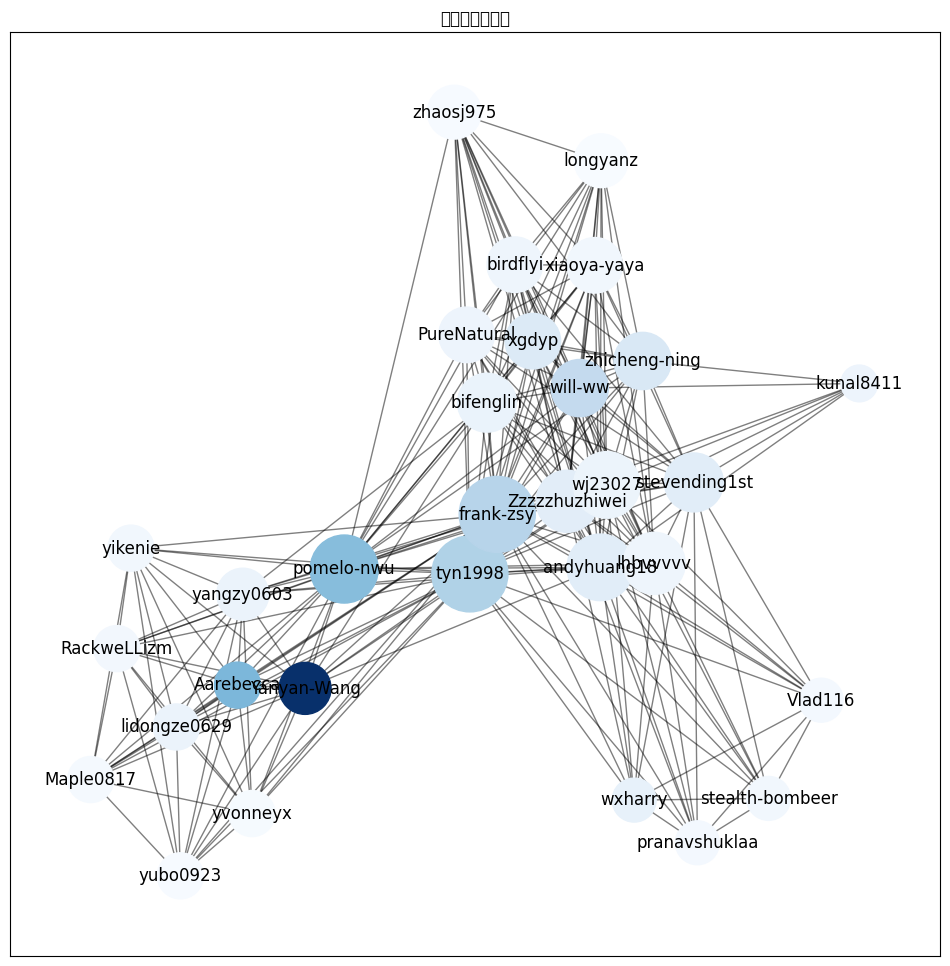

In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('hw4_data.json', 'r') as f:
    data = json.load(f)

nodes_data = data['nodes'] 
edges_data = data['edges']  

G = nx.Graph()

for node in nodes_data:
    G.add_node(node[0], influence=node[1])

for edge in edges_data:
    G.add_edge(edge[0], edge[1], weight=edge[2])

degree_dict = dict(G.degree())
node_sizes = [degree_dict[node] * 100 for node in G.nodes()] 

influence_dict = nx.get_node_attributes(G, 'influence')
node_colors = [influence_dict[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title('用户关系网络图')
plt.show()